In [12]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl
from google.colab import drive
import os
drive.mount('/content/gdrive', force_remount = True)
os.chdir('/content/gdrive/My Drive/Colab Notebooks')

Mounted at /content/gdrive


# Building a Perceptron based classifier

In [0]:
text = np.loadtxt('data_perceptron.txt')

In [0]:
data = text[:, :2]
labels = text[:, 2].reshape((text.shape[0], 1))

Text(0.5, 1.0, 'Input data')

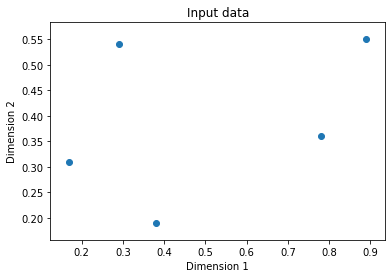

In [15]:
# Plot input data
plt.figure()
plt.scatter(data[:,0], data[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Input data')

In [0]:
dim1_min, dim1_max, dim2_min, dim2_max = 0, 1, 0, 1
num_output = labels.shape[1]
dim1 = [dim1_min, dim1_max]
dim2 = [dim2_min, dim2_max]
perceptron = nl.net.newp([dim1, dim2], num_output)

In [17]:
error_progress = perceptron.train(data, labels, epochs=100, show=20, lr=0.03)


The goal of learning is reached


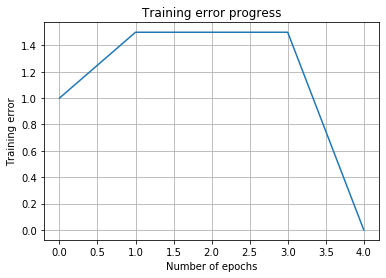

In [18]:
plt.figure()
plt.plot(error_progress)
plt.xlabel('Number of epochs')
plt.ylabel('Training error')
plt.title('Training error progress')
plt.grid()
plt.show()

In [0]:
text = np.loadtxt('data_simple_nn.txt')
data = text[:, 0:2]
labels = text[:, 2:]

# Constructing a single layer neural network

Text(0.5, 1.0, 'Input data')

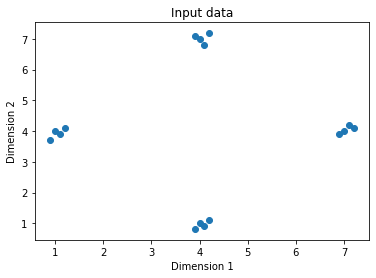

In [20]:
plt.figure()
plt.scatter(data[:,0], data[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Input data')

In [0]:
dim1_min, dim1_max = data[:,0].min(), data[:,0].max()
dim2_min, dim2_max = data[:,1].min(), data[:,1].max()
num_output = labels.shape[1]
dim1 = [dim1_min, dim1_max]
dim2 = [dim2_min, dim2_max]
nn = nl.net.newp([dim1, dim2], num_output)

In [22]:
error_progress = nn.train(data, labels, epochs=100, show=20, lr=0.03)

Epoch: 20; Error: 4.0;
Epoch: 40; Error: 4.0;
Epoch: 60; Error: 4.0;
Epoch: 80; Error: 4.0;
Epoch: 100; Error: 4.0;
The maximum number of train epochs is reached


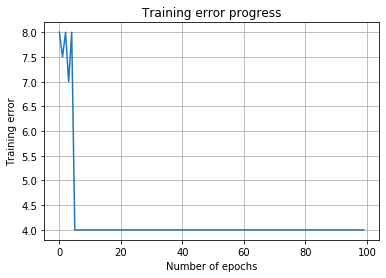

In [24]:
plt.figure()
plt.plot(error_progress)
plt.xlabel('Number of epochs')
plt.ylabel('Training error')
plt.title('Training error progress')
plt.grid()
plt.show()

In [25]:
print('\nTest results:')
data_test = [[0.4, 4.3], [4.4, 0.6], [4.7, 8.1]]
for item in data_test:
 print(item, '-->', nn.sim([item])[0])


Test results:
[0.4, 4.3] --> [0. 0.]
[4.4, 0.6] --> [1. 0.]
[4.7, 8.1] --> [1. 1.]


# Constructing a multilayer neural network

In [0]:
min_val = -15
max_val = 15
num_points = 130
x = np.linspace(min_val, max_val, num_points)
y = 3 * np.square(x) + 5
y /= np.linalg.norm(y)
data = x.reshape(num_points, 1)
labels = y.reshape(num_points, 1)

Text(0.5, 1.0, 'Input data')

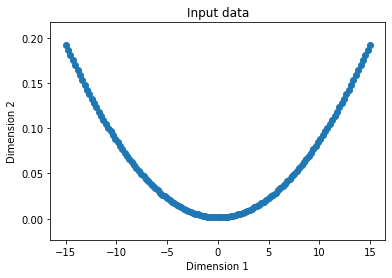

In [27]:
plt.figure()
plt.scatter(data, labels)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Input data')


In [28]:
nn = nl.net.newff([[min_val, max_val]], [10, 6, 1])
nn.trainf = nl.train.train_gd
error_progress = nn.train(data, labels, epochs=2000, show=100, goal=0.01)

Epoch: 100; Error: 0.014072918883169881;
Epoch: 200; Error: 0.011914206580196875;
Epoch: 300; Error: 0.01047870624370284;
The goal of learning is reached


In [0]:
output = nn.sim(data)
y_pred = output.reshape(num_points)

Text(0.5, 1.0, 'Training error progress')

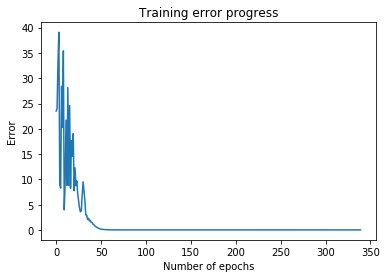

In [30]:
plt.figure()
plt.plot(error_progress)
plt.xlabel('Number of epochs')
plt.ylabel('Error')
plt.title('Training error progress')

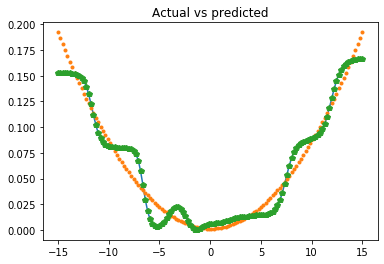

In [32]:
x_dense = np.linspace(min_val, max_val, num_points * 2)
y_dense_pred = nn.sim(x_dense.reshape(x_dense.size,1)).reshape(x_dense.size)
plt.figure()
plt.plot(x_dense, y_dense_pred, '-', x, y, '.', x, y_pred, 'p')
plt.title('Actual vs predicted')
plt.show()


# Building a vector quantizer

In [0]:
text = np.loadtxt('data_vector_quantization.txt')


In [0]:
data = text[:, 0:2]
labels = text[:, 2:]

In [0]:
num_input_neurons = 10
num_output_neurons = 4
weights = [1/num_output_neurons] * num_output_neurons
nn = nl.net.newlvq(nl.tool.minmax(data), num_input_neurons, weights)
_ = nn.train(data, labels, epochs=500, goal=-1)

In [0]:
xx, yy = np.meshgrid(np.arange(0, 10, 0.2), np.arange(0, 10, 0.2))
xx.shape = xx.size, 1
yy.shape = yy.size, 1
grid_xy = np.concatenate((xx, yy), axis=1)


In [0]:
grid_eval = nn.sim(grid_xy)


In [0]:
class_1 = data[labels[:,0] == 1]
class_2 = data[labels[:,1] == 1]
class_3 = data[labels[:,2] == 1]
class_4 = data[labels[:,3] == 1]

In [0]:
grid_1 = grid_xy[grid_eval[:,0] == 1]
grid_2 = grid_xy[grid_eval[:,1] == 1]
grid_3 = grid_xy[grid_eval[:,2] == 1]
grid_4 = grid_xy[grid_eval[:,3] == 1]

In [0]:
plt.plot(class_1[:,0], class_1[:,1], 'ko',
 class_2[:,0], class_2[:,1], 'ko',
 class_3[:,0], class_3[:,1], 'ko',
 class_4[:,0], class_4[:,1], 'ko')
plt.plot(grid_1[:,0], grid_1[:,1], 'm.',
 grid_2[:,0], grid_2[:,1], 'bx',
 grid_3[:,0], grid_3[:,1], 'c^',
 grid_4[:,0], grid_4[:,1], 'y+')
plt.axis([0, 10, 0, 10])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Vector quantization')
plt.show()


# Analyzing sequential data using recurrent neural networks


In [0]:
def get_data(num_points):
 wave_1 = 0.5 * np.sin(np.arange(0, num_points))
 wave_2 = 3.6 * np.sin(np.arange(0, num_points))
 wave_3 = 1.1 * np.sin(np.arange(0, num_points))
 wave_4 = 4.7 * np.sin(np.arange(0, num_points))
 amp_1 = np.ones(num_points)
 amp_2 = 2.1 + np.zeros(num_points)
 amp_3 = 3.2 * np.ones(num_points)
 amp_4 = 0.8 + np.zeros(num_points)
 wave = np.array([wave_1, wave_2, wave_3, wave_4]).reshape(num_points * 4, 1)
 amp = np.array([[amp_1, amp_2, amp_3, amp_4]]).reshape(num_points * 4, 1)
 return wave, amp

In [0]:
def visualize_output(nn, num_points_test):
 wave, amp = get_data(num_points_test)
 output = nn.sim(wave)
 plt.plot(amp.reshape(num_points_test * 4))
 plt.plot(output.reshape(num_points_test * 4))

In [0]:
num_points = 40
wave, amp = get_data(num_points)

In [0]:
nn = nl.net.newelm([[-2, 2]], [10, 1], [nl.trans.TanSig(), nl.trans.PureLin()])

In [0]:
nn.layers[0].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
nn.layers[1].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
nn.init()

In [61]:
error_progress = nn.train(wave, amp, epochs=1200, show=100, goal=0.01)


Epoch: 100; Error: 0.7414748872428925;
Epoch: 200; Error: 0.25569132277138834;
Epoch: 300; Error: 0.067780054892253;
Epoch: 400; Error: 0.051435531670771105;
Epoch: 500; Error: 0.04530822252571944;
Epoch: 600; Error: 0.04178112382026367;
Epoch: 700; Error: 0.039252783294934826;
Epoch: 800; Error: 0.038283036423909504;
Epoch: 900; Error: 0.03649145545487738;
Epoch: 1000; Error: 0.035664904335399;
Epoch: 1100; Error: 0.03809785962286276;
Epoch: 1200; Error: 0.03572546429767074;
The maximum number of train epochs is reached


In [0]:
output = nn.sim(wave)


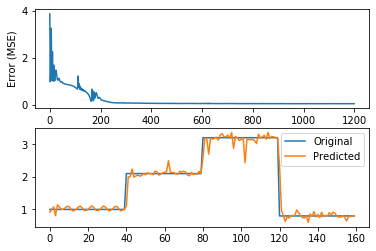

In [64]:
plt.subplot(211)
plt.plot(error_progress)
plt.xlabel('Number of epochs')
plt.ylabel('Error (MSE)')
plt.subplot(212)
plt.plot(amp.reshape(num_points * 4))
plt.plot(output.reshape(num_points * 4))
plt.legend(['Original', 'Predicted'])

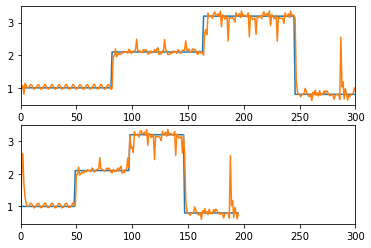

In [65]:
plt.figure()
plt.subplot(211)
visualize_output(nn, 82)
plt.xlim([0, 300])
plt.subplot(212)
visualize_output(nn, 49)
plt.xlim([0, 300])
plt.show()

# Visualizing characters in an Optical Character Recognition database

In [0]:
import os
import sys
import cv2
import numpy as np

In [0]:
input_file = 'letter.data'

In [0]:
img_resize_factor = 12
start = 6
end = -1
height, width = 16, 8


In [0]:
with open(input_file, 'r') as f:
 for line in f.readlines():
  data = np.array([255 * float(x) for x in line.split('\t')[start:end]])

In [0]:
img = np.reshape(data, (height, width))
img_scaled = cv2.resize(img, None, fx=img_resize_factor, fy=img_resize_factor)
cv2.imshow('Image', img_scaled)
c = cv2.waitKey()
if c == 27:
 break

# Building an Optical Character Recognition engine

In [0]:
input_file = 'letter.data'
num_datapoints = 50
orig_labels = 'omandig'
num_orig_labels = len(orig_labels)
num_train = int(0.9 * num_datapoints)
num_test = num_datapoints - num_train
start = 6
end = -1
data = []
labels = []
with open(input_file, 'r') as f:
  for line in f.readlines():
    list_vals = line.split('\t')
    if list_vals[1] not in orig_labels:
      continue
    label = np.zeros((num_orig_labels, 1))
    label[orig_labels.index(list_vals[1])] = 1
    labels.append(label)
    if len(data) >= num_datapoints:
      break

In [0]:
data = np.asfarray(data)
labels = np.array(labels).reshape(num_datapoints, num_orig_labels)

In [0]:
num_dims = len(data[0])

In [0]:
nn = nl.net.newff([[0, 1] for _ in range(len(data[0]))], [128, 16, num_orig_labels])
nn.trainf = nl.train.train_gd

In [0]:
error_progress = nn.train(data[:num_train,:], labels[:num_train,:], epochs=10000, show=100, goal=0.01)


In [0]:
print('\nTesting on unknown data:')
predicted_test = nn.sim(data[num_train:, :])
for i in range(num_test):
 print('\nOriginal:', orig_labels[np.argmax(labels[i])])
 print('Predicted:', orig_labels[np.argmax(predicted_test[i])])

# LSTM

In [92]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

Using TensorFlow backend.


In [0]:
max_features = 20000
maxlen = 80 
batch_size = 32
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=max_features)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')
print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
model = Sequential()
model.add(Embedding(max_features, 128, dropout=0.2))
model.add(LSTM(128, dropout_W=0.2, dropout_U=0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=5, validation_data=(X_test, y_test))


# Transfer Learning

In [0]:
import numpy as np
np.random.seed(2017) # for reproducibility
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
batch_size = 128
nb_classes = 5
nb_epoch = 5
img_rows, img_cols = 28, 28
nb_filters = 32
pool_size = 2
kernel_size = 3
input_shape = (img_rows, img_cols, 1)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train_lt5 = X_train[y_train < 5]
y_train_lt5 = y_train[y_train < 5]
X_test_lt5 = X_test[y_test < 5]
y_test_lt5 = y_test[y_test < 5]
X_train_gte5 = X_train[y_train >= 5]
y_train_gte5 = y_train[y_train >= 5] - 5 
X_test_gte5 = X_test[y_test >= 5]
y_test_gte5 = y_test[y_test >= 5] - 5

def train_model(model, train, test, nb_classes):
 X_train = train[0].reshape((train[0].shape[0],) + input_shape)
 X_test = test[0].reshape((test[0].shape[0],) + input_shape)
 X_train = X_train.astype('float32')
 X_test = X_test.astype('float32')
 X_train /= 255
 X_test /= 255
 print('X_train shape:', X_train.shape)
 print(X_train.shape[0], 'train samples')
 print(X_test.shape[0], 'test samples')
 Y_train = np_utils.to_categorical(train[1], nb_classes)
 Y_test = np_utils.to_categorical(test[1], nb_classes)
 model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])
 model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
 score = model.evaluate(X_test, Y_test, verbose=0)
 print('Test score:', score[0])
 print('Test accuracy:', score[1])

feature_layers = [
 Convolution2D(nb_filters, kernel_size, kernel_size,
 border_mode='valid',
 input_shape=input_shape),
 Activation('relu'),
 Convolution2D(nb_filters, kernel_size, kernel_size),
 Activation('relu'),
 MaxPooling2D(pool_size=(pool_size, pool_size)),
 Dropout(0.25),
 Flatten(),
]
classification_layers = [
 Dense(128),
 Activation('relu'),
 Dropout(0.5),
 Dense(nb_classes),
 Activation('softmax')
]
model = Sequential(feature_layers + classification_layers)
train_model(model, (X_train_lt5, y_train_lt5), (X_test_lt5, y_test_lt5), nb_classes)